In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


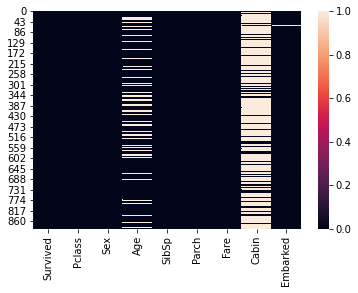

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
df.drop(['Cabin'],axis=1,inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


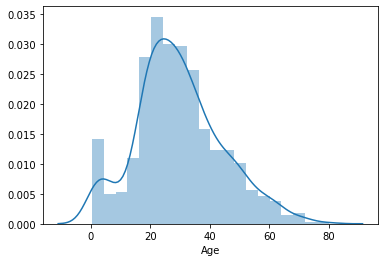

In [11]:
sns.distplot(df['Age'])

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df['Age'].fillna(28,inplace=True)

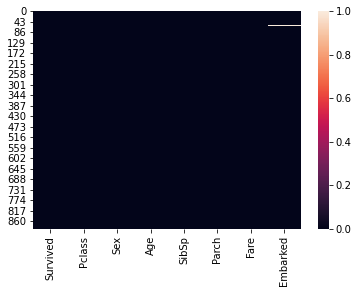

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [16]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df['Embarked'].fillna('S',inplace=True)

In [18]:
df.duplicated().sum()

116

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(775, 8)

In [21]:
df.duplicated().sum()

0

In [22]:
df.reset_index(drop=True,inplace=True)

In [23]:
df.index

RangeIndex(start=0, stop=775, step=1)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
for i in df.columns:
    print(df[i].value_counts())

0    455
1    320
Name: Survived, dtype: int64
3    401
1    210
2    164
Name: Pclass, dtype: int64
male      483
female    292
Name: Sex, dtype: int64
28.00    121
24.00     29
18.00     25
22.00     24
19.00     23
        ... 
0.75       1
55.50      1
70.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64
0    508
1    201
2     27
4     18
3     14
5      5
8      2
Name: SibSp, dtype: int64
0    571
1    114
2     75
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
13.0000    31
26.0000    30
8.0500     25
10.5000    23
7.7500     20
           ..
25.9250     1
13.8583     1
7.6292      1
15.0500     1
8.1375      1
Name: Fare, Length: 248, dtype: int64
S    562
C    155
Q     58
Name: Embarked, dtype: int64


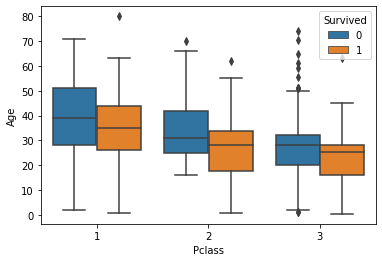

In [26]:
sns.boxplot(y='Age',x='Pclass',hue='Survived',data=df)

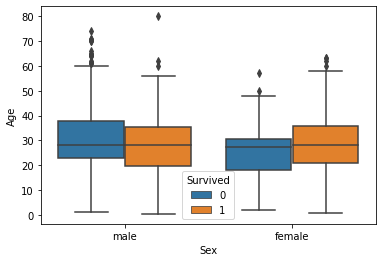

In [27]:
sns.boxplot(y='Age',x='Sex',hue='Survived',data=df)

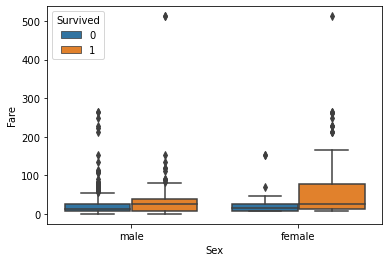

In [28]:
sns.boxplot(y='Fare',x='Sex',hue='Survived',data=df)

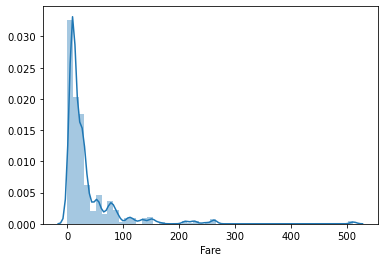

In [29]:
sns.distplot(df['Fare'])

In [30]:
df['Fare'].loc[(df['Fare'])>200].value_counts().sum()

20

In [31]:
for i in range(len(df['Fare'])):
    if df['Fare'][i]>200:
        df['Fare'][i]=200

<ipython-input-31-c4f475d30bd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'][i]=200


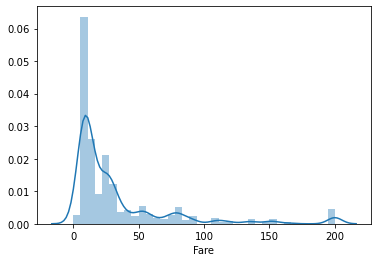

In [32]:
sns.distplot(df['Fare'])

In [33]:
X=df.drop(['Survived'],axis=1)

In [34]:
y=df['Survived']

In [35]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [36]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 48.6+ KB


In [38]:
le=LabelEncoder()

In [39]:
for i in ['Sex','Embarked']:
    X[i]=le.fit_transform(X[i])

In [40]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [47]:
X=np.array(X)

In [48]:
y=np.array(y)

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [50]:
model=LogisticRegression(solver='liblinear')

In [51]:
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [56]:
predictions=model.predict(X_test)

In [57]:
accuracy_score(y_test,predictions)

0.8064516129032258

In [54]:
model.score(X,y)

0.7767741935483871